In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import zipfile

# Unzip the dataset
local_zip = 'archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('archive_file')
zip_ref.close()

In [3]:
import os
from glob import glob
from PIL import Image
HAM10000_images_part_1 = os.path.join('./archive_file/HAM10000_images_part_1')
HAM10000_images_part_2= os.path.join('./archive_file/HAM10000_images_part_2')
HAM10000_metadata = os.path.join('./archive_file/HAM10000_metadata.csv')

In [4]:
HAM10000_images_part_1

'./archive_file/HAM10000_images_part_1'

In [5]:
HAM10000_images_part_1_name = os.listdir(HAM10000_images_part_1)
print(HAM10000_images_part_1_name[:10])
HAM10000_images_part_2_name = os.listdir(HAM10000_images_part_2)

['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg', 'ISIC_0024311.jpg', 'ISIC_0024312.jpg', 'ISIC_0024313.jpg', 'ISIC_0024314.jpg', 'ISIC_0024315.jpg']


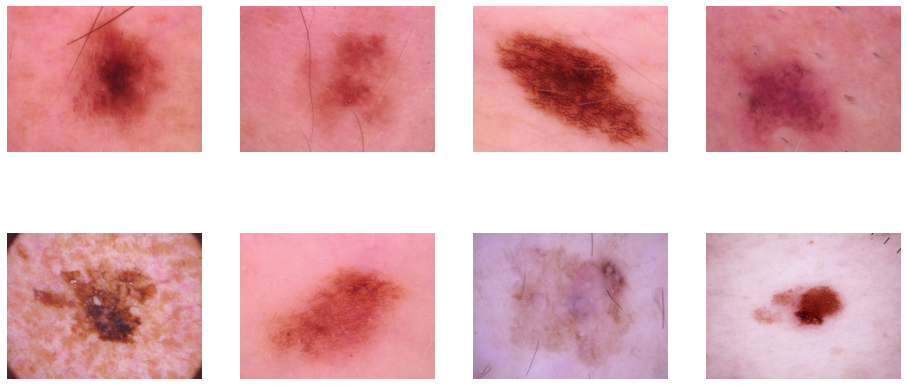

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pix = [os.path.join(r"D:\KAGGLE\skin_cancer_detection\archive_file\HAM10000_images_part_1", fname)
                for fname in HAM10000_images_part_1_name[pic_index-8:pic_index]]           # list of path to png
for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
for i in range(0,len(HAM10000_images_part_1_name)):
    HAM10000_images_part_1_name[i] = r'./archive_file/HAM10000_images_part_1/' + HAM10000_images_part_1_name[i]

In [10]:
for i in range(0,len(HAM10000_images_part_2_name)):
    HAM10000_images_part_2_name[i] = r'./archive_file/HAM10000_images_part_2/' + HAM10000_images_part_2_name[i]

In [11]:
HAM10000_images_part_merged = HAM10000_images_part_1_name+HAM10000_images_part_2_name

In [12]:
len(HAM10000_images_part_1_name)+len(HAM10000_images_part_2_name),len(HAM10000_images_part_merged)

(10015, 10015)

In [13]:
df = pd.read_csv(HAM10000_metadata)

In [16]:
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [ ]:
HAM10000_images_part_merged

In [18]:
image_mapping = dict(zip(df['image_id'], HAM10000_images_part_merged))

# Add a new column to the DataFrame with image addresses using the mapping
df['path'] = df['image_id'].map(image_mapping)

In [19]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./archive_file/HAM10000_images_part_1/ISIC_002...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,./archive_file/HAM10000_images_part_2/ISIC_003...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,./archive_file/HAM10000_images_part_2/ISIC_003...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,./archive_file/HAM10000_images_part_2/ISIC_003...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,./archive_file/HAM10000_images_part_2/ISIC_003...


In [21]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((96,96))))

In [22]:
print(df['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [23]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [24]:
df['cell_type'] = df['dx'].map(lesion_type_dict.get)

In [25]:
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

In [26]:
df['cell_type_idx'].unique()

array([2, 4, 3, 6, 5, 1, 0], dtype=int8)

In [27]:
df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
image             0
cell_type         0
cell_type_idx     0
dtype: int64

In [28]:
df['age'].fillna((df['age'].median()), inplace = True)

In [29]:
df['image'].map(lambda x: x.shape).value_counts()

(96, 96, 3)    10015
Name: image, dtype: int64

In [30]:
df['image']=df['image']/255

In [31]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...,"[[[0.8941176470588236, 0.5137254901960784, 0.5...",Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...,"[[[0.8470588235294118, 0.4745098039215686, 0.5...",Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...,"[[[0.9647058823529412, 0.6784313725490196, 0.7...",Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./archive_file/HAM10000_images_part_1/ISIC_002...,"[[[0.807843137254902, 0.4627450980392157, 0.52...",Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./archive_file/HAM10000_images_part_1/ISIC_002...,"[[[0.2823529411764706, 0.12941176470588237, 0....",Benign keratosis-like lesions,2


In [32]:
from tensorflow.keras.utils import to_categorical
X = df.drop(columns = ['cell_type_idx'], axis = 1)
y = df['cell_type_idx']
y = to_categorical(y, num_classes = 7)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

X_train_i = np.asarray(X_train['image'].tolist())
X_test_i = np.asarray(X_test['image'].tolist())

X_train_norm = (X_train_i - np.mean(X_train_i))/np.std(X_train_i)
X_test_norm = (X_test_i - np.mean(X_test_i))/np.std(X_test_i)

In [34]:
#let's create a balanced dataset as well

In [35]:
desired_rows_per_class = 600

grouped = df.groupby('cell_type_idx')

balanced_df = pd.DataFrame()

# Iterate over each group
for group, data in grouped:
    # Sample the desired number of rows from each group
    sampled_data = data.sample(n=desired_rows_per_class,replace= True, random_state=42)
    # Append the sampled data to the balanced DataFrame
    balanced_df = balanced_df.append(sampled_data)

# Reset the index of the balanced DataFrame
balanced_df = balanced_df.reset_index(drop=True)

C:\Users\Win10\AppData\Local\Temp\ipykernel_13968\3191956523.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_data)
C:\Users\Win10\AppData\Local\Temp\ipykernel_13968\3191956523.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_data)
C:\Users\Win10\AppData\Local\Temp\ipykernel_13968\3191956523.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_data)
C:\Users\Win10\AppData\Local\Temp\ipykernel_13968\3191956523.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(sampled_data)


In [36]:
balanced_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,cell_type,cell_type_idx
0,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,./archive_file/HAM10000_images_part_2/ISIC_003...,"[[[0.3176470588235294, 0.24705882352941178, 0....",Actinic keratoses,0
1,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,./archive_file/HAM10000_images_part_2/ISIC_003...,"[[[0.6745098039215687, 0.5411764705882353, 0.6...",Actinic keratoses,0
2,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,./archive_file/HAM10000_images_part_2/ISIC_003...,"[[[0.6901960784313725, 0.6196078431372549, 0.6...",Actinic keratoses,0
3,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,./archive_file/HAM10000_images_part_2/ISIC_003...,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",Actinic keratoses,0
4,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,./archive_file/HAM10000_images_part_2/ISIC_003...,"[[[0.49411764705882355, 0.4666666666666667, 0....",Actinic keratoses,0


In [37]:
X_sample = balanced_df.drop(columns = ['cell_type_idx'], axis = 1)
y_sample = balanced_df['cell_type_idx']
y_sample = to_categorical(y_sample, num_classes = 7)

In [38]:
X_sample_i = np.asarray(X_sample['image'].tolist())

In [39]:
X_sample_norm = (X_sample_i - np.mean(X_sample_i))/np.std(X_sample_i)

In [40]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample_norm, y_sample, test_size = 0.2)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Conv2D,MaxPool2D, Dropout, Flatten,  BatchNormalization

In [42]:
#model 1
#suggested by autokeras
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(96, 96, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 128)       0

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [44]:
history = model.fit(
    X_train_s, y_train_s,
    epochs=50,
    batch_size = 40,
    validation_data=(X_test_s, y_test_s),
    verbose=10)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [45]:
score = model.evaluate(X_test_s, y_test_s)
print('Test accuracy:', score)

27/27 [==============================] - 15s 530ms/step - loss: 1.9326 - acc: 0.6500
Test accuracy: [1.9326382875442505, 0.6499999761581421]


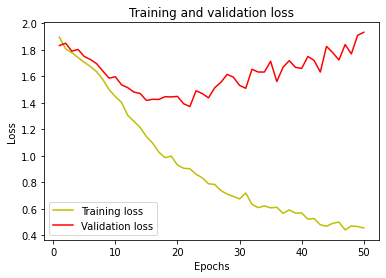

In [46]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

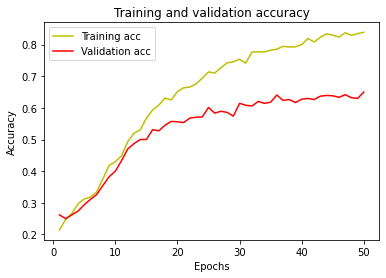

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
# Prediction on test data
y_pred = model.predict(X_test_s)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test_s, axis = 1) 
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm

27/27 [==============================] - 15s 530ms/step


array([[102,   1,   2,   0,  11,   1,   4],
       [  3,  79,  12,   2,  11,  10,  15],
       [  7,  10,  48,   4,  10,   6,  16],
       [  0,   1,   4, 113,   1,   0,   5],
       [ 14,  17,  25,   6,  22,   7,  18],
       [  0,   1,   1,   0,   0, 117,   2],
       [  6,  18,  17,   4,  12,  10,  65]], dtype=int64)

In [49]:
import pickle
pickle.dump(model, open('skin_cancr_model1.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://5e3253f5-1517-4356-a71a-3c4b21a2de94/assets


INFO:tensorflow:Assets written to: ram://5e3253f5-1517-4356-a71a-3c4b21a2de94/assets


In [54]:
# model2 
from keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf

In [56]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

In [59]:
base_model=MobileNetV2(include_top=False, weights="imagenet", input_shape=(96,96,3))

model2 = Sequential()
model2.add(base_model)
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Dropout(0.40))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(7, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 64)          737344    
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                      

In [60]:
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [63]:
history2 = model2.fit(
    X_train_s, y_train_s,
    epochs=40,
    batch_size = 50,
    validation_data=(X_test_s, y_test_s),
    verbose=2)

Epoch 1/40
68/68 - 92s - loss: 1.9952 - acc: 0.1521 - val_loss: 1.9445 - val_acc: 0.1560 - 92s/epoch - 1s/step
Epoch 2/40
68/68 - 78s - loss: 1.9360 - acc: 0.1631 - val_loss: 1.9464 - val_acc: 0.1500 - 78s/epoch - 1s/step
Epoch 3/40
68/68 - 77s - loss: 1.9382 - acc: 0.1565 - val_loss: 1.9478 - val_acc: 0.1202 - 77s/epoch - 1s/step
Epoch 4/40
68/68 - 94s - loss: 1.8643 - acc: 0.2220 - val_loss: 1.8861 - val_acc: 0.2119 - 94s/epoch - 1s/step
Epoch 5/40
68/68 - 90s - loss: 1.7946 - acc: 0.2443 - val_loss: 1.8077 - val_acc: 0.2488 - 90s/epoch - 1s/step
Epoch 6/40
68/68 - 84s - loss: 1.7695 - acc: 0.2399 - val_loss: 1.9527 - val_acc: 0.1560 - 84s/epoch - 1s/step
Epoch 7/40
68/68 - 87s - loss: 1.7220 - acc: 0.2673 - val_loss: 2.5586 - val_acc: 0.2429 - 87s/epoch - 1s/step
Epoch 8/40
68/68 - 83s - loss: 1.7041 - acc: 0.2705 - val_loss: 2.1080 - val_acc: 0.2595 - 83s/epoch - 1s/step
Epoch 9/40
68/68 - 83s - loss: 1.6495 - acc: 0.2786 - val_loss: 1.9469 - val_acc: 0.2393 - 83s/epoch - 1s/step
E

In [64]:
import pickle
pickle.dump(model2, open('model2_skin.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://f8a36a6d-010b-4097-88b7-88cc7f4b9ffa/assets


INFO:tensorflow:Assets written to: ram://f8a36a6d-010b-4097-88b7-88cc7f4b9ffa/assets


In [65]:
score = model.evaluate(X_test_s, y_test_s)
print('Test accuracy:', score)

27/27 [==============================] - 14s 510ms/step - loss: 1.9326 - acc: 0.6500
Test accuracy: [1.9326382875442505, 0.6499999761581421]


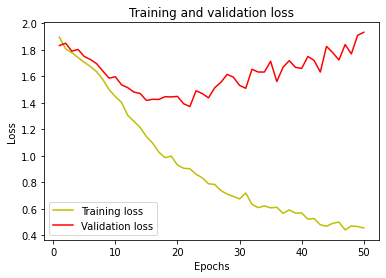

In [66]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

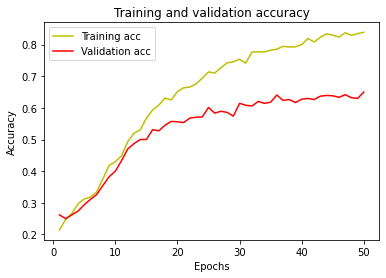

In [67]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
model3 = Sequential()
model3.add(base_model)
model3.add(Flatten())
model3.add(Dense(1022,activation='relu'))
model3.add(Dense(7, activation='softmax'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 11520)             0         
                                                                 
 dense_8 (Dense)             (None, 1022)              11774462  
                                                                 
 dense_9 (Dense)             (None, 7)                 7161      
                                                                 
Total params: 14,039,607
Trainable params: 14,005,495
Non-trainable params: 34,112
_________________________________________________________________


In [69]:
from keras.optimizers import RMSprop

model3.compile(loss='CategoricalCrossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [70]:
history = model3.fit(
    X_train_s, y_train_s,
    epochs=30,
    batch_size = 40,
    validation_data=(X_test_s, y_test_s),
    verbose=10)

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [71]:
import pickle
pickle.dump(model3, open('model2_skin.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://a83e8054-9864-41e5-b383-6c23e76a7bd0/assets


INFO:tensorflow:Assets written to: ram://a83e8054-9864-41e5-b383-6c23e76a7bd0/assets


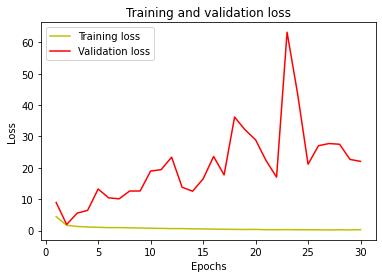

In [72]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()